In [1]:
!pip install gradio

In [2]:
import cv2 as cv
import os
from random import shuffle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import gradio
import gradio as gr
import cv2
from keras.models import load_model
from PIL import Image
from keras.utils import np_utils
from tabulate import tabulate

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataPath='DATASET/chestimages'
Categories=os.listdir(dataPath)

labels=[i for i in range (len(Categories))]


labeldict={}

for i in range (len(Categories)):
    labeldict[Categories[i]]=labels[i]

print(Categories)
print(labels)
print(labeldict)

['NORMAL', 'PNEUMONIA']
[0, 1]
{'NORMAL': 0, 'PNEUMONIA': 1}


In [5]:
normal_dir_count = "DATASET/chestimages/NORMAL"
pneumonia_dir_count = "DATASET/chestimages/PNEUMONIA"
normal_count = len(os.listdir(normal_dir_count))
pneumonia_count = len(os.listdir(pneumonia_dir_count))

table = [["Directory", "Count"],
         ["NORMAL", normal_count],
         ["PNEUMONIA", pneumonia_count]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═════════════╤═════════╕
│ Directory   │   Count │
╞═════════════╪═════════╡
│ NORMAL      │    1570 │
├─────────────┼─────────┤
│ PNEUMONIA   │    4260 │
╘═════════════╧═════════╛


In [6]:
pneumonia = os.listdir("DATASET/chestimages/PNEUMONIA")
pneumonia_dir = "DATASET/chestimages/PNEUMONIA"

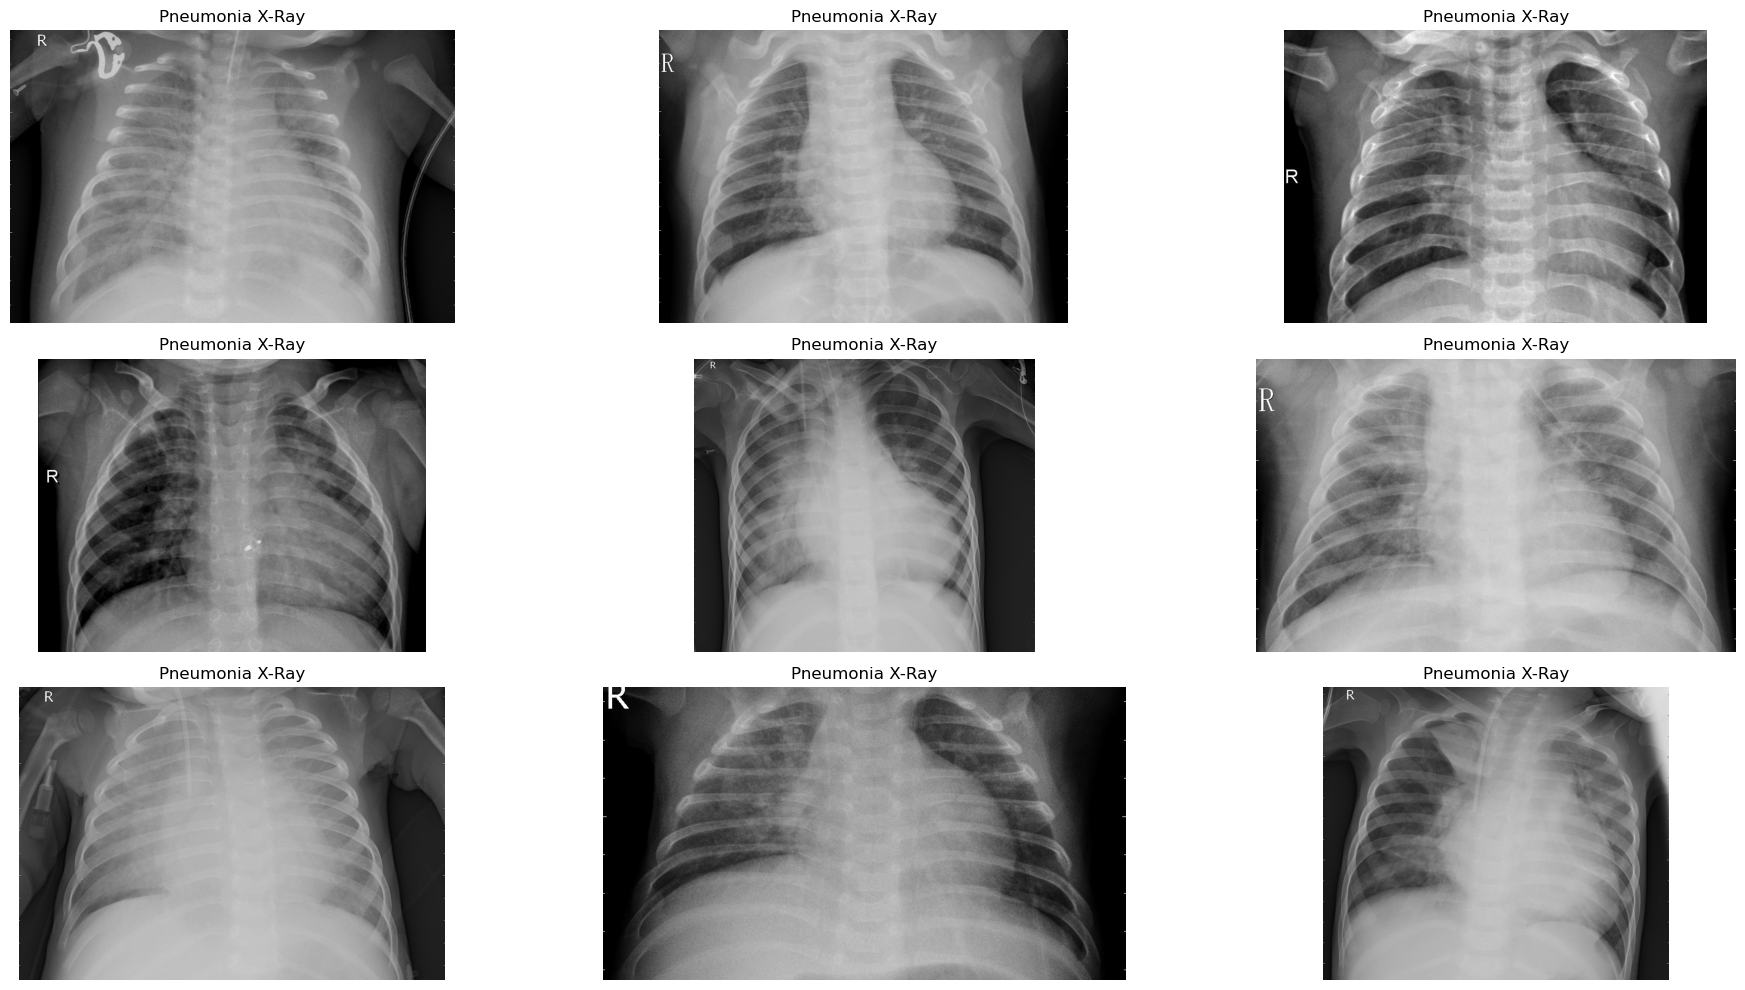

In [7]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Pneumonia X-Ray")
plt.tight_layout()

In [8]:
normal = os.listdir("DATASET/chestimages/NORMAL")
normal_dir = "DATASET/chestimages/NORMAL"

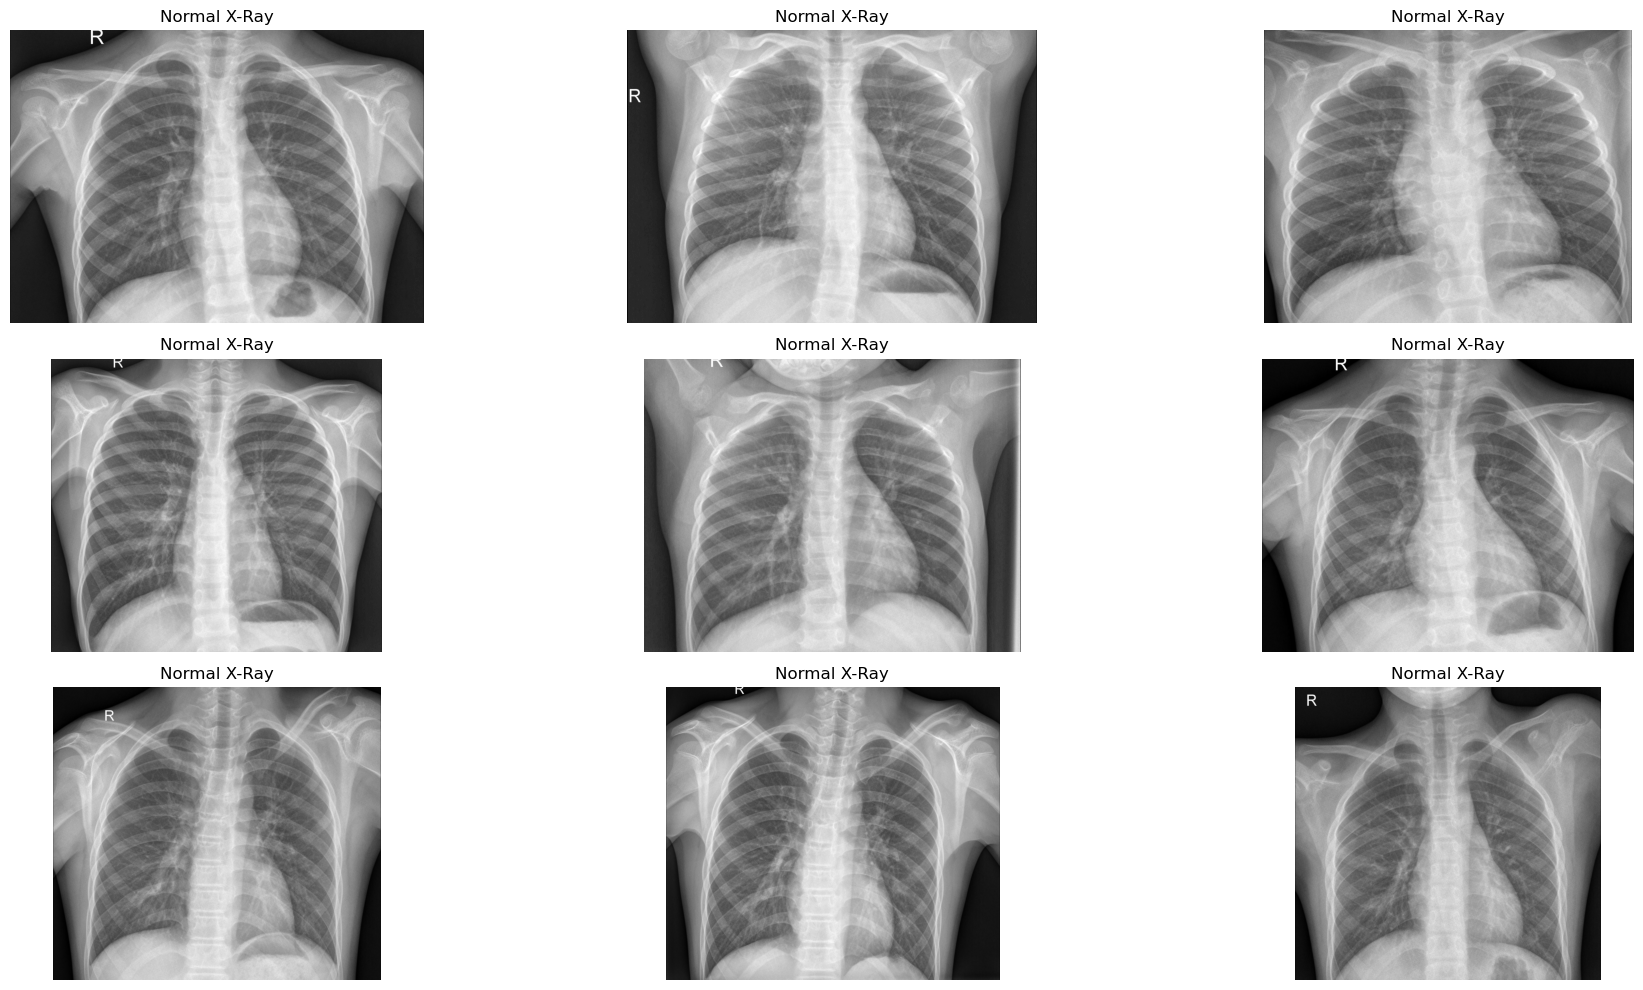

In [9]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Normal X-Ray") 
   
plt.tight_layout()

In [10]:
imageSize=128
Dataset=[]

for Category in Categories:
    folderPath=os.path.join(dataPath,Category)
    imageNames=os.listdir(folderPath)
    
    for imageName in imageNames:
        imagePath=os.path.join(folderPath,imageName)
        image=cv.imread(imagePath)
        
        try:
            grayImage = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
            resized=cv.resize(grayImage,(imageSize,imageSize))
            Dataset.append([resized,labeldict[Category]])
            
        except Exception as e:
            print(e)

In [11]:
#shuffle(Dataset)

In [12]:
data=[]
target=[]

for feature,label in Dataset:
    data.append(feature)
    target.append(label)

In [13]:
positives=[]
negatives=[]
for i in range(len(data)):
    if target[i]:
        positives.append(data[i])
    else:
        negatives.append(data[i])

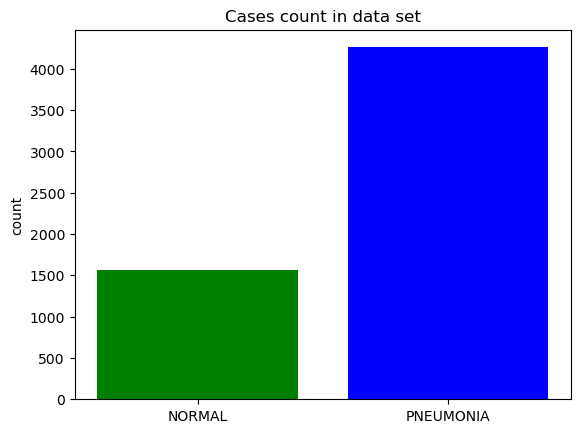

In [14]:
plt.bar(Categories, [len(negatives),len(positives),], color=["green", "blue"])
plt.title("Cases count in data set")
plt.ylabel("count")
plt.show()

Class label: 0


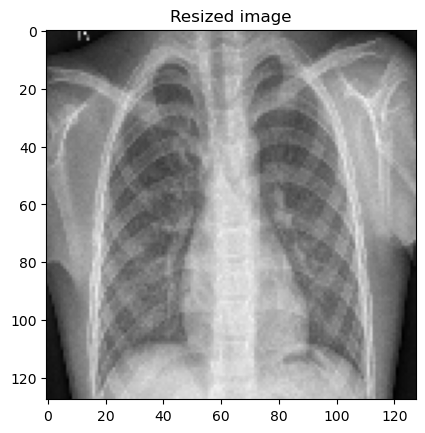

In [15]:
plt.imshow(data[10],cmap="gray") 
print("Class label:",target[10]) 
plt.title("Resized image")
plt.show()

In [16]:
data=np.array(data)/255
print(data.shape)
data=np.reshape(data,(data.shape[0],imageSize,imageSize,1))
target=np.array(target)
print(data.shape)
print(target.shape)
newTarget=np_utils.to_categorical(target)

(5830, 128, 128)
(5830, 128, 128, 1)
(5830,)


In [17]:
np.save('dataChestXray',data)
np.save('targetChestXray',newTarget)

In [18]:
data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


In [19]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 61, 61, 32)        0         
                                                        

In [20]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [21]:
history=model.fit(train_data,train_target,epochs=8)

Epoch 1/8
146/146 [==============================] - 46s 302ms/step - loss: 0.5292 - accuracy: 0.7609
Epoch 2/8
146/146 [==============================] - 33s 228ms/step - loss: 0.2971 - accuracy: 0.8722
Epoch 3/8
146/146 [==============================] - 33s 226ms/step - loss: 0.2462 - accuracy: 0.8971
Epoch 4/8
146/146 [==============================] - 39s 268ms/step - loss: 0.2223 - accuracy: 0.9142
Epoch 5/8
146/146 [==============================] - 41s 284ms/step - loss: 0.1907 - accuracy: 0.9258
Epoch 6/8
146/146 [==============================] - 34s 232ms/step - loss: 0.2018 - accuracy: 0.9237
Epoch 7/8
146/146 [==============================] - 46s 316ms/step - loss: 0.1763 - accuracy: 0.9346
Epoch 8/8
146/146 [==============================] - 38s 261ms/step - loss: 0.1780 - accuracy: 0.9374


In [22]:
print(model.evaluate(test_data,test_target))

37/37 [==============================] - 3s 43ms/step - loss: 0.1474 - accuracy: 0.9425
[0.14742469787597656, 0.9425386190414429]


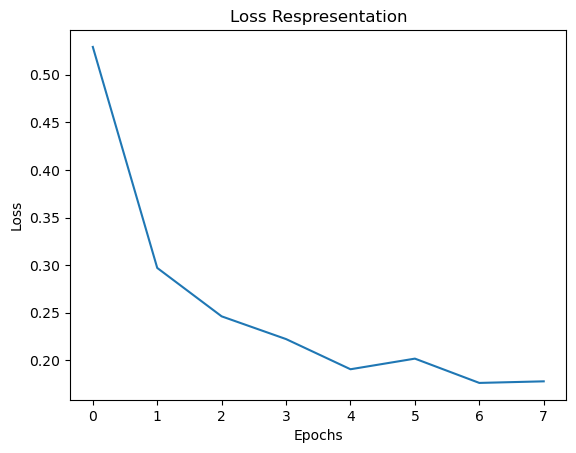

In [23]:
plt.plot(history.history['loss'])
plt.title("Loss Respresentation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

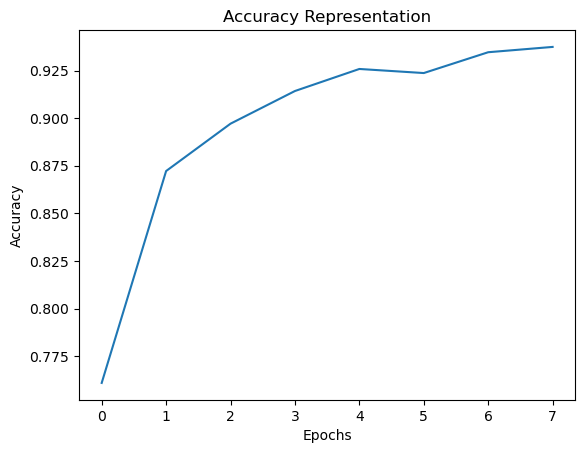

In [24]:
plt.plot(history.history['accuracy'])
plt.title("Accuracy Representation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [25]:
predictions = model.predict(test_data)
binary_predictions = np.argmax(predictions, axis=1)

37/37 [==============================] - 2s 44ms/step


In [26]:
test_target_binary = np.argmax(test_target, axis=1)

test_target_binary = test_target_binary.astype(int)
binary_predictions = np.array(binary_predictions).astype(int)

cm = confusion_matrix(test_target_binary, binary_predictions)
cm

array([[280,  38],
       [ 29, 819]], dtype=int64)

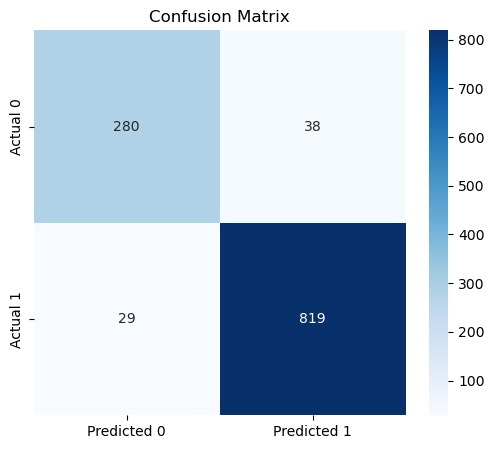

In [27]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import classification_report

test_target_binary = np.argmax(test_target, axis=1)
binary_predictions = np.argmax(predictions, axis=1)

class_report = classification_report(test_target_binary, binary_predictions, target_names=Categories)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.84      0.92      0.88       292
   PNEUMONIA       0.97      0.94      0.96       874

    accuracy                           0.94      1166
   macro avg       0.91      0.93      0.92      1166
weighted avg       0.94      0.94      0.94      1166



In [29]:
test_target_binary = np.argmax(test_target, axis=1) if len(test_target.shape) > 1 else test_target

correct = np.where(binary_predictions == test_target_binary)[0]
incorrect = np.where(binary_predictions != test_target_binary)[0]

print(f"Number of correct predictions: {len(correct)}")
print(f"Number of incorrect predictions: {len(incorrect)}")

Number of correct predictions: 1092
Number of incorrect predictions: 74


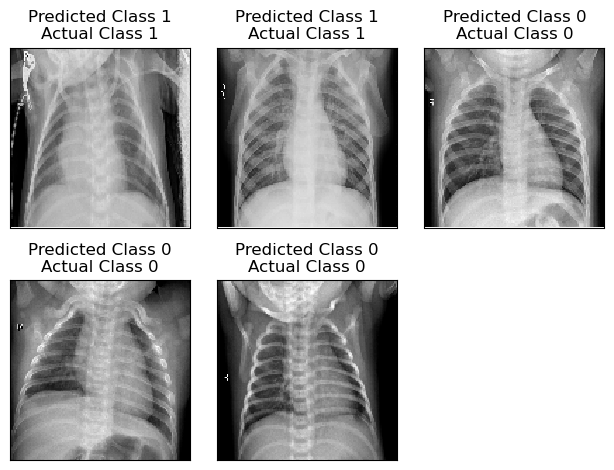

In [30]:
for i, c in enumerate(correct[:5]):
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[c].reshape(128, 128), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}\nActual Class {}".format(
        binary_predictions[c], test_target_binary[c]))
    plt.tight_layout()
plt.show()

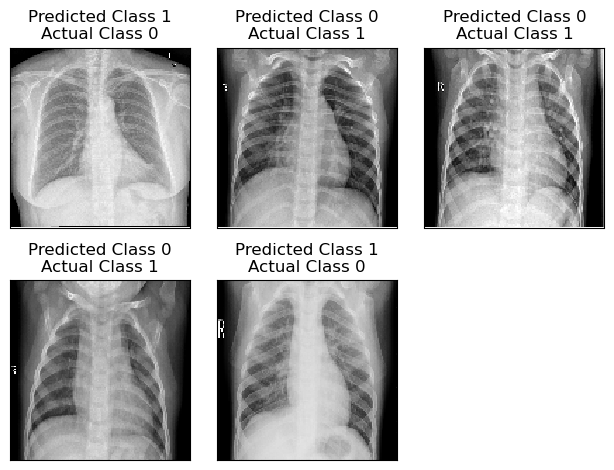

In [31]:
for i, c in enumerate(incorrect[:5]):
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[c].reshape(128, 128), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}\nActual Class {}".format(
        binary_predictions[c], test_target_binary[c]))
    plt.tight_layout()
plt.show()

In [32]:
from IPython.display import Image, display, Markdown

testPath = 'DATASET/Testimages'
imageNames = os.listdir(testPath)
descriptions = []
image_width = 150
image_height = 150

for i, imageName in enumerate(imageNames, 1):
    imagePath = os.path.join(testPath, imageName)
    image = cv.imread(imagePath)
    grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    resized = cv.resize(grayImage, (128, 128))
    normalized = resized / 255
    reshaped = np.reshape(normalized, (1, 128, 128, 1))
    result = model.predict(reshaped)
    label = np.argmax(result, axis=1)[0]
    prob = np.max(result, axis=1)[0]
    prob = round(prob, 2) * 100
    category_label = Categories[label]
    image_filename = f"output_image_{i}.png"
    cv.imwrite(image_filename, image)
    description = f"**Image {i}**\n\n" \
                  f"Prediction: {category_label}\n" \
                  f"Confidence: {prob}%\n\n" \
                  f"<img src='{image_filename}' width='{image_width}' height='{image_height}'>"

    descriptions.append(description)
output_markdown = "\n\n".join(descriptions)
display(Markdown(output_markdown))

1/1 [==============================] - 0s 47ms/step


**Image 1**

Prediction: PNEUMONIA
Confidence: 58.99999737739563%

<img src='output_image_1.png' width='150' height='150'>

**Image 2**

Prediction: PNEUMONIA
Confidence: 97.00000286102295%

<img src='output_image_2.png' width='150' height='150'>

**Image 3**

Prediction: NORMAL
Confidence: 82.99999833106995%

<img src='output_image_3.png' width='150' height='150'>

**Image 4**

Prediction: NORMAL
Confidence: 63.999998569488525%

<img src='output_image_4.png' width='150' height='150'>

**Image 5**

Prediction: NORMAL
Confidence: 69.9999988079071%

<img src='output_image_5.png' width='150' height='150'>

**Image 6**

Prediction: NORMAL
Confidence: 74.00000095367432%

<img src='output_image_6.png' width='150' height='150'>

**Image 7**

Prediction: PNEUMONIA
Confidence: 100.0%

<img src='output_image_7.png' width='150' height='150'>

**Image 8**

Prediction: PNEUMONIA
Confidence: 100.0%

<img src='output_image_8.png' width='150' height='150'>

**Image 9**

Prediction: PNEUMONIA
Confidence: 100.0%

<img src='output_image_9.png' width='150' height='150'>

**Image 10**

Prediction: PNEUMONIA
Confidence: 81.00000023841858%

<img src='output_image_10.png' width='150' height='150'>

In [33]:
def pneumonia_prediction(image_pil):
    if image_pil is None:
        return "No image provided"

    img = image_pil.convert('L')
    img = np.array(img)
    img = cv2.resize(img, (imageSize, imageSize))
    img = img.reshape(-1, imageSize, imageSize, 1)
    img = img / 255.0
    predictions = model.predict(img)
    is_normal = predictions[0][0]

    if is_normal > 0.5:
        prediction_label = "NORMAL" 
    else:
        prediction_label = "PNEUMONIC" 

    return prediction_label

In [34]:
input_component = gr.inputs.Image(type="pil", label="Upload a chest X-ray image")
output_component = gr.outputs.Textbox(label="Prediction")

In [35]:
gr.Interface(fn=pneumonia_prediction, inputs=input_component, outputs=output_component, live=True).launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 67ms/step
